In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kf_book.mkf_internal as mkf_internal

## Multivariate Normal Distribution Equation

Here is the multivariate normal distribution in $n$ dimensions.

$$
f(\mathbf{x},\, \mu,\,\Sigma) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}\, \exp  \Big [{ -\frac{1}{2}(\mathbf{x}-\mu)^\mathsf{T}\Sigma^{-1}(\mathbf{x}-\mu) \Big ]}
$$
I urge you not to try to remember this equation. We will program it in a Python function and then call it if we need to compute a specific value. However, note that it has the same form as the univariate normal distribution:

$$ 
f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \Big [{-\frac{1}{2}}{(x-\mu)^2}/\sigma^2 \Big ]
$$
The multivariate version merely replaces the scalars of the univariate equations with matrices. 

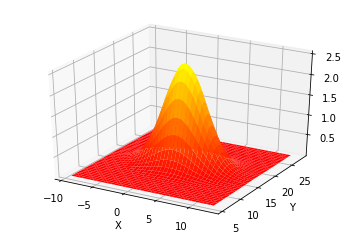

In [2]:
mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

This is a plot of multivariate Gaussian with a mean of $\mu=[\begin{smallmatrix}2\\17\end{smallmatrix}]$ and a covariance of $\Sigma=[\begin{smallmatrix}10&amp;0\\0&amp;4\end{smallmatrix}]$. The three dimensional shape shows the probability density for any value of $(X, Y)$ in the z-axis. I have projected the variance for x and y onto the walls of the chart - you can see that they take on the Gaussian bell curve shape. The curve for $X$ is wider than the curve for $Y$, which is explained by $\sigma_x^2=10$ and $\sigma_y^2=4$. The highest point of the 3D surface is at the the means for $X$ and $Y$.

All multivariate Gaussians have this shape. If we think of this as the Gaussian for the position of a dog, the z-value at each point of ($X, Y$) is the probability density of the dog being at that position. Strictly speaking this is the joint probability density function, which I will define soon. So, the dog has the highest probability of being near (2, 17), a modest probability of being near (5, 14), and a very low probability of being near (10, 10). As with the univariate case this is a probability density, not a probability. Continuous distributions have an infinite range, and so the probability of being exactly at (2, 17), or any other point, is 0%. We can compute the probability of being within a given range by computing the volume under the surface with an integral.

#### FilterPy implements the equation with the function multivariate_gaussian() in the filterpy.stats.

In [3]:
from filterpy.stats import gaussian, multivariate_gaussian

In [4]:
x = [2.5, 7.3]
mu = [2.0, 7.0]
P = [[8., 0.], 
     [0., 3.]]

In [5]:
%precision 4
multivariate_gaussian(x, mu, P)

0.0315

### Joint Probability

The joint probability, denoted $P(x,y)$, is the probability of both $x$ and $y$ happening. For example, if you roll two die $P(2,5)$ is the probability of the first die rolling a 2 and the second die rolling a 5. Assuming the die are six sided and fair, the probability $P(2,5) = \frac{1}{6}\times \frac{1}{6}=\frac{1}{36}$. The 3D chart above shows the *joint probability density function*.

### Marginal Probability

The marginal probability is the probability of an event happening without regard of any other event. In the chart above the Gaussian curve drawn to the left is the marginal for $Y$. This is the probability for the dog being at any position in $Y$ disregarding the value for $X$. Earlier I wrote "I have projected the variance for x and y onto the walls of the chart"; these are the marginal probabilities for $x$ and $y$. Another computational benefit of Gaussians is that the marginal of a multivariate Gaussian is another Gaussian!

Let's look at this in a slightly different way. Instead of plotting a surface showing the probability distribution I will generate 1,000 points with the distribution of $[\begin{smallmatrix}8& 0\\0& 3\end{smallmatrix}]$.

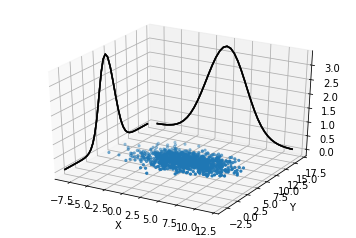

In [6]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

We can think of the sampled points as being possible locations for our dog given those particular mean and covariances. The contours on the side show the marginal probability for $X$ and $Y$. We can see that he is far more likely to be at (2, 7) where there are many points, than at (-5, 5) where there are few.

As beautiful as these plots are, it is hard to get useful information from them. For example, it is not easy to tell if $X$ and $Y$ both have the same variance, and how much they are correlated. In most of the book I'll display Gaussians as contour plots.

The contour plots display the range of values that the multivariate Gaussian takes for a specific standard deviation. This is like taking a horizontal slice out of the 3D plot. These plots show the shape of the slice for 3 standard deviations.

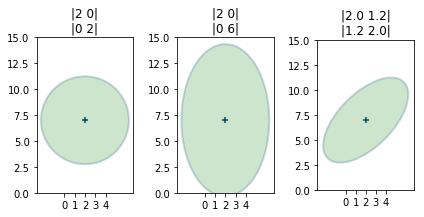

In [7]:
mkf_internal.plot_3_covariances()

For those of you viewing this online or in Juptyer Notebook on your computer, here is an animation of varying the covariance while holding the variance constant.

![text](../animations/multivariate_ellipse.gif)

For example, variance=3**2 or std=3 would display the 3rd standard deviation, and variance=[1,4,9] or std=[1,2,3] would display the 1st, 2nd, and 3rd standard deviations.

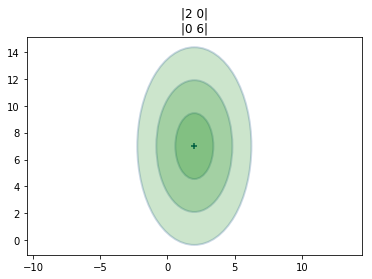

In [8]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(b=False);

The solid colors may suggest to you that the probability distribution is constant between the standard deviations. This is not true, as you can tell from the 3D plot of the Gaussian. Here is a 2D shaded representation of the probability distribution for the covariance ($\begin{smallmatrix}2&amp;1.2\\1.2&amp;1.3\end{smallmatrix})$. Darker gray corresponds to higher probability density.

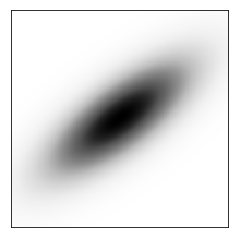

In [9]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

#### Eg 1.
Thinking about the physical interpretation of these plots clarifies their meaning. The mean and covariance of the first plot is

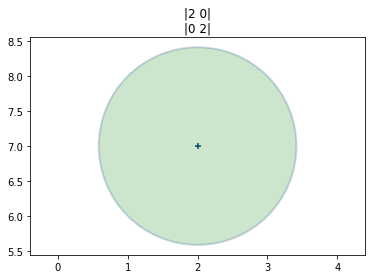

In [10]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(b=False)

A Bayesian way of thinking about this is that the ellipse shows us the amount of error in our belief. A tiny circle would indicate that we have a very small error, and a very large circle indicates a lot of error in our belief. The shape of the ellipse shows us the geometric relationship of the errors in $X$ and $Y$. Here we have a circle so errors in $X$ and $Y$ are equally likely.

#### Eg 2.
The mean and covariance of the second plot are

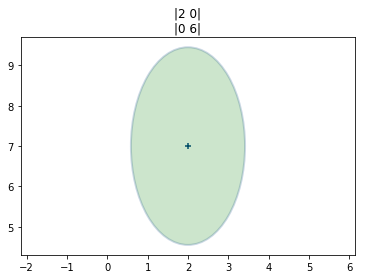

In [11]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(b=False)

This time we use a different variance for $X$ ($\sigma_x^2=2$) vs $Y$ ($\sigma^2_y=6$). The result is a tall and narrow ellipse. We can see that a lot more uncertainty in $Y$ vs $X$. In both cases we believe the dog is at (2, 7), but the uncertainties are different.

#### Eg 3.

The third plot shows the mean and covariance

$$
\mu =\begin{bmatrix}2\\7\end{bmatrix}, \, \, \, 
\Sigma = \begin{bmatrix}2&amp;1.2\\1.2&amp;2\end{bmatrix}
$$

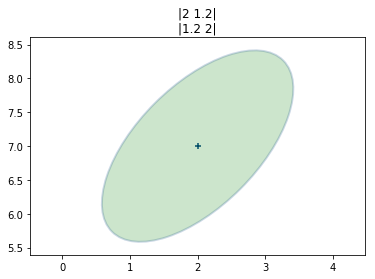

In [12]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

This is the first contour that has values in the off-diagonal elements of the covariance, and this is the first contour plot with a slanted ellipse. This is not a coincidence. The two facts are telling us the same thing. A slanted ellipse tells us that the $x$ and $y$ values are somehow correlated. The off-diagonal elements in the covariance matrix are non-zero, indicating that a correlation exists.

#### Eg 4. Height vs Weight

We can use NumPy's cov() function to compute the covariance of two or more variables by placing them into a 2D array. Let's do that, then plot the $2\sigma$ covariance ellipse on top of the data. We will need to use bias=1 because the data represents the entire population; it is not a sample.

In [13]:
height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]

In [14]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.5249,  135.701 ],
       [ 135.701 , 1092.29  ]])

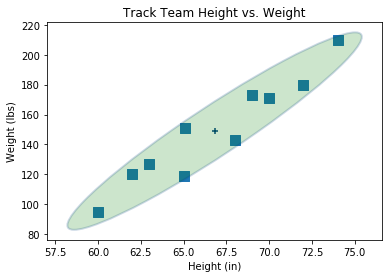

In [15]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

This should help you form a strong intuition on the meaning and use of covariances. The covariance ellipse shows you how the data is 'scattered' in relation to each other. A narrow ellipse like this tells you that the data is very correlated. There is only a narrow range of weights for any given height. The ellipse leans towards the right, telling us there is a positive correlation - as x increases y also increases. If the ellipse leaned towards the left then the correlation would be negative - as x increases y decreases.

#### Eg 5. Height vs Weight

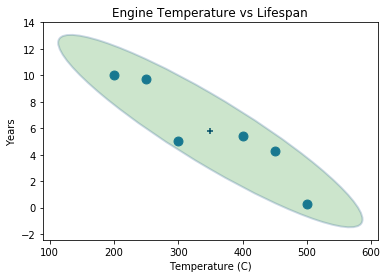

In [16]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

The relationships between variances and covariances can be hard to puzzle out by inspection, so here is an interactive plot.

## Pearson's Correlation Coefficient

The correlation between two variables can be given a numerical value with Pearson's Correlation Coefficient. It is defined as

$$\rho_{xy} = \frac{COV(X, Y)}{\sigma_x \sigma_y}$$
This value can range in value from -1 to 1. If the covariance is 0 than $\rho=0$. A value greater than 0 indicates that the relationship is a positive correlation, and a negative value indicates that there is a negative correlation. Values near -1 or 1 indicate a very strong correlation, and values near 0 indicate a very weak correlation.

Correlation and covariance are very closely related. Covariance has units associated with it, and correlation is a unitless ratio. For example, for our dog $\sigma_{xy}$ has units of meters squared.

We can use scipy.stats.pearsonr function to compute the Pearson coefficient. It returns a tuple of the Pearson coefficient and of the 2 tailed p-value. The latter is not used in this book. Here we compute $\rho$ for height vs weight of student athletes:

In [17]:
from scipy.stats import pearsonr
pearsonr(height, weight)[0]

0.9540

Here we compute the correlation between engine temperature and lifespan.

In [18]:
pearsonr(max_temp, lifespan)[0]

-0.9178

## Using Correlations to Improve Estimates
Suppose we believe our dog is at position (5, 10) with some given covariance. If the standard deviation in x and y is each 2 meters, but they are strongly correlated, the covariance contour would look something like this.

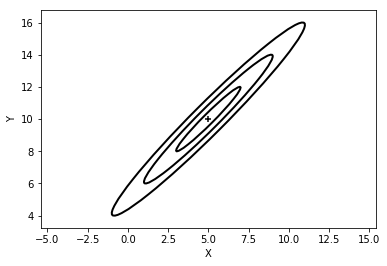

In [19]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

Now suppose I were to tell you that we know that $x=7.5$. What can we infer about the value for $y$? The position is extremely likely to lie within the 3$\sigma$ covariance ellipse. We can infer the position in y based on the covariance matrix because there is a correlation between x and y. I've illustrated the likely range of values for y as a blue filled circle.

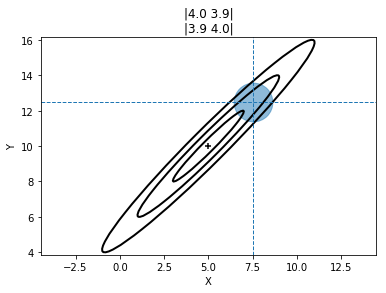

In [20]:
mkf_internal.plot_correlation_covariance()

The circle not mathematically correct, but it gets the idea across. For now recognize that we can predict that $y$ is likely near 12. A value of $y=-10$ is extremely improbable.